In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = mpl.cm.get_cmap('coolwarm')

def make_df(read_path, data_att, sample_num, label2name):
    read_df = pd.read_csv(read_path)
    if sample_num is None:
        sample_num = len(read_df)
    if data_att['label'] == 0 or data_att['label'] == 1:
        read_df = read_df.sample(sample_num)
        read_df['label'] = data_att['label']
    else:
        read_df = pd.concat([
            read_df[read_df[data_att['label']]==0].sample(sample_num // 2),
            read_df[read_df[data_att['label']]==1].sample(sample_num // 2)
        ])
        read_df['label'] = read_df[data_att['label']]

    if data_att['id'] is None:
        read_df['id'] = range(sample_num)
    else:
        read_df['id'] = read_df[data_att['id']]

    return_df = pd.DataFrame({
        'id': read_df['id'],
        'text': read_df[data_att['text']],
        'label': read_df['label'],
        'label_name': read_df['label'].map(label2name)
    })

    return return_df.reset_index(drop=True)

def show_df(org_df):
    plot_df = org_df.copy()

    # Display information about the external data
    print("# External Data: {:,}".format(len(plot_df)))
    print("# Sample:")

    # Show distribution of answers using a bar plot
    plt.figure(figsize=(8, 4))
    plot_df['label_name'].value_counts().plot.bar(color=[cmap(0.0), cmap(0.65)])
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Answer distribution for External Data")
    plt.show()
    return plot_df.head(5)

/var/folders/hm/bfsx_0_d0d53_0mr4q0q1dcr0000gn/T/ipykernel_2774/1740626509.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('coolwarm')


In [2]:
class CFG:
    TRAIN_DATA = 'Hello-SimpleAI-HC3/train_data.csv'
    TEST_DATA = 'Hello-SimpleAI-HC3/test_data.csv'

    # CSV
    #   id: if None, then create a new id using range(num_of_...data)
    #   label: If 0 or 1, then create a new label where all values are 0 or 1
    train_att = {
        'id': None,
        'text': 'text',
        'label': 'label'
    }
    test_att = {
        'id': None,
        'text': 'text',
        'label': 'label'
    }
    class_names = ["real", "fake"]  # Class names [A, B, C, D, E]
    num_classes = len(class_names)  # Number of classes
    class_labels = list(range(num_classes))  # Class labels [0, 1, 2, 3, 4]
    label2name = dict(zip(class_labels, class_names))  # Label to class name mapping
    name2label = {v: k for k, v in label2name.items()}  # Class name to label mapping

# External Data: 8,000
# Sample:


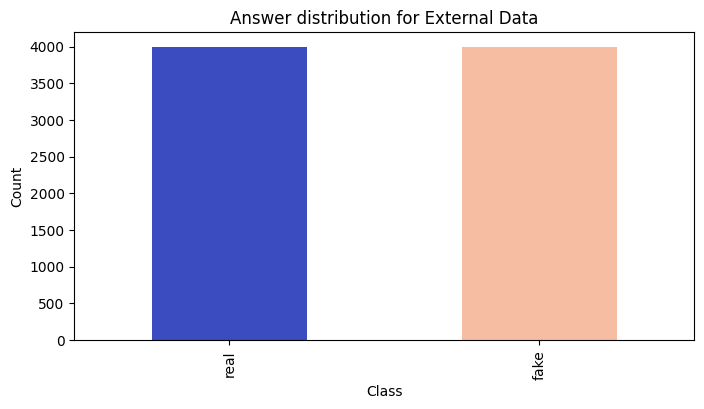

,id,text,label,label_name
0,0,"[""because your in a metal tube thousands of fe...",0,real
1,1,"[""An LLC is a very flexible company when it co...",0,real
2,2,"[""I 'm a broker . I have never seen the tradin...",0,real
3,3,"['Air causes bubbles , which are surprisingly ...",0,real
4,4,['There are many ways to be infected with a bu...,0,real


In [3]:
train_df = make_df(CFG.TRAIN_DATA, CFG.train_att, 8000, CFG.label2name)
show_df(train_df)

# External Data: 2,000
# Sample:


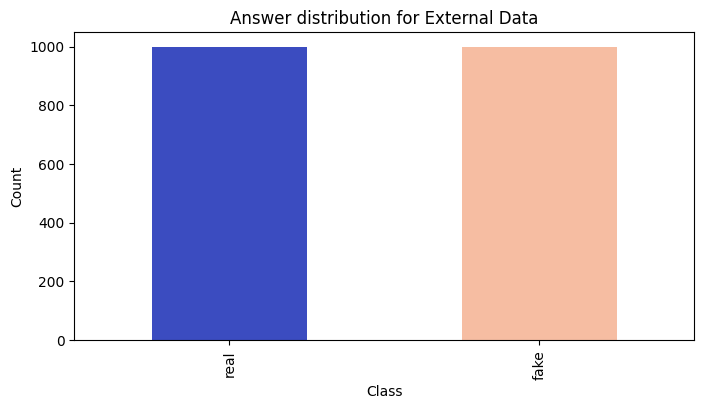

,id,text,label,label_name
0,0,"[""If you're sinking 1k/year into it, and the v...",0,real
1,1,"[""Most US banks don't allow you the ability to...",0,real
2,2,"[""OK , so , the Bureau of Land Management is a...",0,real
3,3,"['For information about the UK situation, chec...",0,real
4,4,['Swallowing does not rely on gravity . The mu...,0,real


In [4]:
test_df = make_df(CFG.TEST_DATA, CFG.test_att, 2000, CFG.label2name)
show_df(test_df)

In [5]:
train_df.to_csv('train_8000.csv')
test_df.to_csv('test_2000.csv')